In [1]:
import splat
import numpy as np
import splat
import pandas as pd
import matplotlib.pyplot as plt
splat.initializeStandards(all=True)
from popsims.plot_style import  plot_style
#plt.style.use('fivethirtyeight')
import warnings
import astropy.units as u

warnings.filterwarnings("ignore", category=RuntimeWarning) 

plot_style()
%matplotlib inline



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
#CONVERT FROM ROMAN PIXEL RESOLUTION TO LAMBDA/DLAMBDA 
#wfc3 24.5 angstrom/pixel becomes 210 at 1000nm
#roman is 11 angstrom/pixel
11/24.5
2/0.44

4.545454545454546

In [3]:
11*u.angstrom.to(u.micron)

0.0011000000000000003

In [4]:
#most important features from Aganze et al. 2022
bands=[[1.246, 1.295],[1.15, 1.20],  [1.56, 1.61], [1.38, 1.43]]
bandlabels=['J-cont', 'H$_2$O-1','H-cont', 'H$_2$O-2']
from matplotlib import patches


Target resolution 100.0 greater than current resolution 75.0; no change made


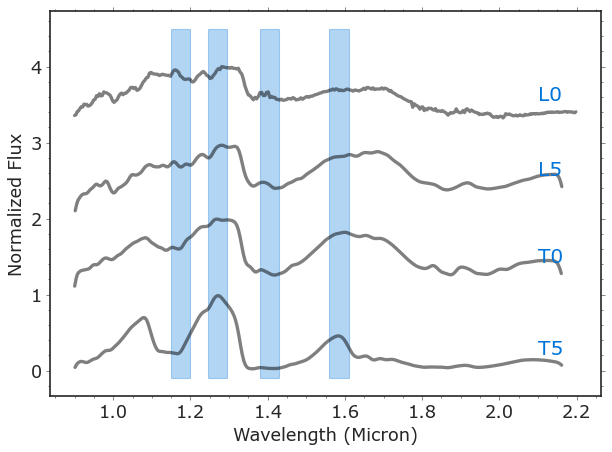

In [23]:
fig, ax=plt.subplots()
ks=np.flip(['L0.0', 'L5.0', 'T0.0', 'T5.0' ])

for wrng, wlabel in zip(bands,  bandlabels):
    rect=patches.Rectangle((wrng[0], -0.1), wrng[1]-wrng[0], 4.6, angle=0.0, color='#0074D9', alpha=0.3)
    ax.add_patch(rect)
    #if wlabel =='H-cont':
    #    ax.text(wrng[0],2.2,wlabel, {'fontsize':14}, color='#111111')
    #else:
    #    ax.text(wrng[0],2.35,wlabel, {'fontsize':14}, color='#111111')
for idx in range(len(ks)):
    k=ks[idx]
    s=splat.STDS_DWARF_SPEX[k]
    s.reset()
    s.trim([0.9, 2.2])
    s.normalize([1.25, 1.3])
    s.smooth(100., resolution=True)


    ax.plot(s.wave, s.flux.value+idx, c='k', alpha=0.5, linewidth=3)
    ax.text(2.1, s.flux.value[-1]+idx+0.15, k[:2], color='#0074D9', fontsize=18 )
    
#ax.set(ylim=[0, 1.3])
ax.minorticks_on()
ax.set(xlabel='Wavelength (Micron)', ylabel='Normalized Flux')

plt.tight_layout()
#
plt.savefig('../figures/important_features.pdf')

In [10]:
s=splat.STDS_DWARF_SPEX[k]
s.reset()

In [17]:
(s.wave[-10]-s.wave[-11]).to(u.Angstrom)

<Quantity 28.79858017 Angstrom>

In [18]:
11./21.8

0.5045871559633027

In [21]:
s.smooth?